In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

X = X / 255.0

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [ ]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)] + 1e-9)
    return np.sum(log_likelihood) / m

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01):
        self.W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
        self.b3 = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = softmax(self.Z3)
        return self.A3

    def backward(self, X, y_true):
        m = X.shape[0]

        dZ3 = self.A3 - y_true
        dW3 = (1/m) * np.dot(self.A2.T, dZ3)
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, y, epochs=10, batch_size=64):
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)

            for i in range(0, X.shape[0], batch_size):
                batch_idx = indices[i:i+batch_size]
                X_batch, y_batch = X[batch_idx], y[batch_idx]

                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch)

            y_pred_train = self.forward(X)
            loss = cross_entropy_loss(y, y_pred_train)
            acc = accuracy(y, y_pred_train)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [ ]:
nn = NeuralNetwork(input_size=784, hidden_size1=128, hidden_size2=64, output_size=10, learning_rate=0.01)
nn.train(X_train, y_train, epochs=100, batch_size=128)

y_pred_test = nn.forward(X_test)
test_acc = accuracy(y_test, y_pred_test)
print("Test Accuracy:", test_acc)

Epoch 1/100 - Loss: 0.9463, Accuracy: 0.7938
Epoch 2/100 - Loss: 0.5053, Accuracy: 0.8686
Epoch 3/100 - Loss: 0.4048, Accuracy: 0.8881
Epoch 4/100 - Loss: 0.3585, Accuracy: 0.8999
Epoch 5/100 - Loss: 0.3304, Accuracy: 0.9054
Epoch 6/100 - Loss: 0.3120, Accuracy: 0.9101
Epoch 7/100 - Loss: 0.2941, Accuracy: 0.9157
Epoch 8/100 - Loss: 0.2809, Accuracy: 0.9190
Epoch 9/100 - Loss: 0.2692, Accuracy: 0.9229
Epoch 10/100 - Loss: 0.2583, Accuracy: 0.9263
Epoch 11/100 - Loss: 0.2491, Accuracy: 0.9284
Epoch 12/100 - Loss: 0.2408, Accuracy: 0.9308
Epoch 13/100 - Loss: 0.2326, Accuracy: 0.9331
Epoch 14/100 - Loss: 0.2252, Accuracy: 0.9362
Epoch 15/100 - Loss: 0.2181, Accuracy: 0.9374
Epoch 16/100 - Loss: 0.2110, Accuracy: 0.9400
Epoch 17/100 - Loss: 0.2033, Accuracy: 0.9423
Epoch 18/100 - Loss: 0.1977, Accuracy: 0.9440
Epoch 19/100 - Loss: 0.1920, Accuracy: 0.9453
Epoch 20/100 - Loss: 0.1869, Accuracy: 0.9471
Epoch 21/100 - Loss: 0.1818, Accuracy: 0.9477
Epoch 22/100 - Loss: 0.1764, Accuracy: 0.94

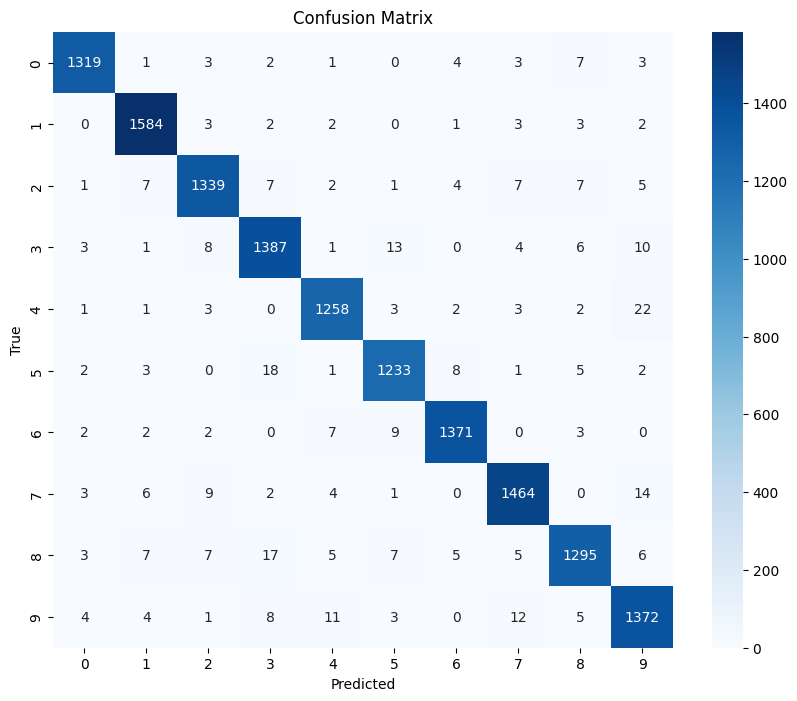


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.96      0.97      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
y_pred_classes = nn.predict(X_test)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))